# Determining convergence order for a multidimensional algorithm

In [8]:
import numpy as np
from scipy.integrate import nquad
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [9]:
%matplotlib inline

## Integration Algorithms

In [29]:
def midpoint_comp_2d(f, x0, x1, y0, y1, nx, ny):
    dx = (x1-x0)/nx
    dy = (y1-y0)/ny
    x = (x0 + dx * (0.5 + np.arange(nx))).reshape(nx, 1)
    y = (y0 + dy * (0.5 + np.arange(ny))).reshape(1, ny)
    
    f_vec = np.vectorize(f)
    return dx * dy * np.sum(f_vec(x, y))

def true_integral_2d(f, x0, x1, y0, y1):
    return nquad(f, ((x0, x1), (y0, y1)))

## Curve fitting

In [181]:
def lin_fit(x, y, x0, x1):
    x_arr = np.array(x)
    y_arr = np.array(y)
    which_inds = np.logical_and(
        x_arr>=x0,
        x_arr<=x1
    )
    x_fit = x_arr[which_inds]
    y_fit = y_arr[which_inds]
    
    def resid(args):
        m, b = args
        res = np.sum((m*x_fit + b - y_fit) ** 2)
        return res
    
    m0 = 1
    b0 = 0
    res = minimize(resid, (m0, b0))
    m, b = res.x
    
    return m, b

In [195]:
def plot_lin_fit(x, y, x0, x1, xlabel='x', ylabel='y', log=True):
    xmin = np.min(x)
    ymin = np.min(y)
    xmax = np.max(x)
    ymax = np.max(y)
    
    plt.plot(x, y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.vlines((x0, x1), ymin, ymax, colors='k', linestyles='dashed')
    
    m, b = lin_fit(x, y, x0, x1)
    label = 'm={:.2f}, b={:.2f}'.format(m, b)
    plt.plot([xmin, xmax], [m*xmin + b, m*xmax + b], '--')
    plt.title(label)
    plt.show()

## Define function and bounds

In [182]:
def f(x, y):
    return np.sin(x) + np.sin(10*y) + (x-y)**2

In [183]:
x0 = 1
x1 = 2
y0 = 0
y1 = 4

## Plot

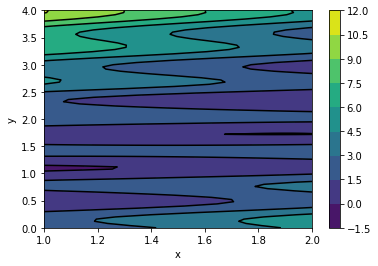

In [184]:
Nc = 101
xc = np.linspace(x0, x1, Nc)
yc = np.linspace(y0, y1, Nc)
xc, yc = np.meshgrid(xc, yc, indexing='ij')

plt.contourf(xc, yc, f(xc, yc))
plt.colorbar()
plt.contour(xc, yc, f(xc, yc), colors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Calculate true solution

In [185]:
true_soln, true_err = true_integral_2d(f, x0, x1, y0, y1)
print(true_soln, true_err)

10.659157042493021 1.6371888924855e-12


## Run grid cases

In [204]:
nx_list = np.unique(np.round(np.logspace(0, 2.5, 20)).astype(int))
ny_list = np.unique(np.round(np.logspace(0, 3.5, 20)).astype(int))

soln_arr = np.zeros([len(nx_list), len(ny_list)])
err_arr = np.zeros([len(nx_list), len(ny_list)])

for i, nx in enumerate(nx_list):
    for j, ny in enumerate(ny_list):
        approx_soln = midpoint_comp_2d(f, x0, x1, y0, y1, nx, ny)
        soln_arr[i, j] = approx_soln
        err_arr[i, j] = np.abs(true_soln - approx_soln)

## Plot error

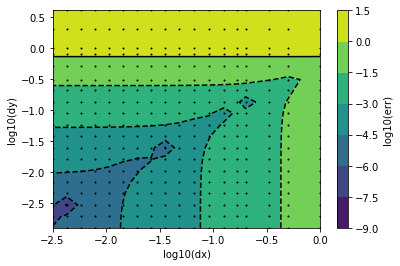

In [205]:
dx_list = (x1-x0)/np.array(nx_list)
dy_list = (y1-y0)/np.array(ny_list)

dx_grid, dy_grid = np.meshgrid(dx_list, dy_list, indexing='ij')

dx_plot = np.log10(dx_grid)
dy_plot = np.log10(dy_grid)
err_plot = np.log10(err_arr)

plt.contourf(dx_plot, dy_plot, err_plot)
plt.colorbar(label='log10(err)')
plt.plot(dx_plot, dy_plot, 'ok', ms=1)
plt.contour(dx_plot, dy_plot, err_plot, colors='k')
plt.xlabel('log10(dx)')
plt.ylabel('log10(dy)')
plt.show()

## Calculate error for best slices

dx


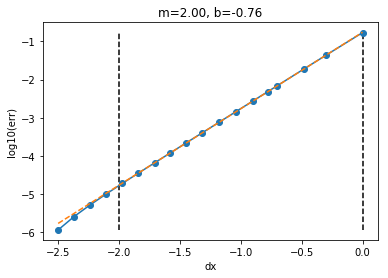

dy


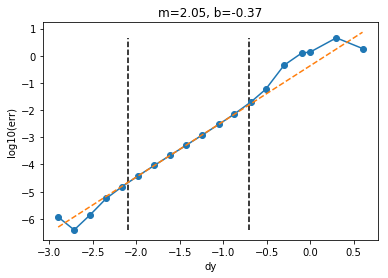

In [211]:
print("dx")
dx_slice = dx_grid[:,-1] 
err_slice = err_arr[:,-1]
plot_lin_fit(np.log10(dx_slice), np.log10(err_slice), -2, 0, xlabel='dx', ylabel='log10(err)')

print("dy")
dy_slice = dy_grid[-1,:] 
err_slice = err_arr[-1,:]
plot_lin_fit(np.log10(dy_slice), np.log10(err_slice), -2.1, -0.7, xlabel='dy', ylabel='log10(err)')